In [1]:
import torch
import torch.nn as nn
import numpy as np
torch.__version__
torch.manual_seed(0)

## Linear Regression

useful links
![Linear_regression_img](./figures/1.7.linear_regression.png)

https://www.youtube.com/watch?v=zPG4NjIkCjc

https://www.kaggle.com/aakashns/pytorch-basics-linear-regression-from-scratch

Linear regression models a linear relationship between two variables. There is usually an independent value $x$
and a dependent value $y$. Linear regression has an equation with the form $y=ax+b$ and finds the optimal values
$a$ and $b$ that best describe the relationship of the variables. More specifically, this equation describes a straight
line with slope eaual to $a$ and $b$ the intercept (the value of $y$ when $x = 0$).



Let's create and initialize randomly our model's variables  $a$ and $b$.

In [2]:

a = torch.randn(1,requires_grad=True)
b = torch.randn(1,requires_grad=True)
print(a)
print(b)


x = torch.randn(1)
y = a*x+b

y.backward()
print(y,x)

tensor([1.5410], requires_grad=True)
tensor([-0.2934], requires_grad=True)
tensor([-3.6509], grad_fn=<AddBackward0>) tensor([-2.1788])


## Fitting a simple line

Let's create a simple dataset and try to fit our linear regression model. We'll initialize randomly our a,b and try to run
some iterations to find the optimal weights that fi oour following line.

$y=2x+0.5$

Now let's create our data and fit our model.

In [3]:

a = torch.randn((1,1),requires_grad=True)
b = torch.randn(1,requires_grad=True)

def model(x):
    return x @ a.t() + b


# MSE LOSS
Mean Squared Error (MSE) or mean squared deviation (MSD) of an estimator
(of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors.

$MSE(y,\hat {y}) =\sum_{i=1}^{N} (y_{i}-\hat{y}_{i})^{2} $

In other words MSE is the mean ${ \left({\frac {1}{n}}\sum _{i=1}^{n}\right)}$
of the squares of the errors ${ (y_{i}-{\hat {y_{i}}})^{2}}$

In [4]:
def mse(y,y_hat):
     return((y-y_hat)**2).mean()




# Create dataset
Now we'll create our data that decribe the equation $y=2x+0.5$.
We will create only 10 samples but you can do more if you like.


In [5]:
inputs = torch.range(1,10).float().unsqueeze(-1)
print(inputs.shape)
print(inputs)
targets = 2. * inputs + 0.5 * torch.ones(10,1)
print(targets.shape)
print(targets)

torch.Size([10, 1])
tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]])
torch.Size([10, 1])
tensor([[ 2.5000],
        [ 4.5000],
        [ 6.5000],
        [ 8.5000],
        [10.5000],
        [12.5000],
        [14.5000],
        [16.5000],
        [18.5000],
        [20.5000]])


/home/iliasprc/Documents/penvs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  """Entry point for launching an IPython kernel.


Let's predict $\hat{y}$ with the untrained model and see what the output and loss values.


In [6]:
preds = model(inputs)
print(preds)


# Compute loss
loss = mse(preds, targets)
print(loss)

# Compute gradients
loss.backward()

tensor([[-0.5161],
        [ 0.0523],
        [ 0.6208],
        [ 1.1892],
        [ 1.7576],
        [ 2.3261],
        [ 2.8945],
        [ 3.4629],
        [ 4.0314],
        [ 4.5998]], grad_fn=<AddBackward0>)
tensor(106.3641, grad_fn=<MeanBackward0>)


Now if we do one backpropagation step, the gradients of the two parameters $a$ and $b$ we will be calculated.

In [7]:
# Gradients for weights
print(a)
print(a.grad)

# Gradients for bias
print(b)
print(b.grad)

a.grad.zero_()
b.grad.zero_()
print(a.grad)
print(b.grad)

tensor([[0.5684]], requires_grad=True)
tensor([[-127.6605]])
tensor([-1.0845], requires_grad=True)
tensor([-18.9163])
tensor([[0.]])
tensor([0.])


It's time train the model now for 100 iterations and test again the predictions.


In [8]:
# Train for 100 epochs
lr = 1e-3
for i in range(100):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        a -= a.grad * lr
        b -= b.grad * lr
        a.grad.zero_()
        b.grad.zero_()

print('Optimization Done')
print(f'a = {a} b = {b}')

# Generate predictions
preds = model(inputs)
print(f'Predictions {preds}')


# Compute loss
loss = mse(preds, targets)
print(f'Loss = {loss.item()}')

preds = model(inputs)
import matplotlib.pyplot as pyplot


Optimization Done
a = tensor([[2.1856]], requires_grad=True) b = tensor([-0.7955], requires_grad=True)
Predictions tensor([[ 1.3901],
        [ 3.5757],
        [ 5.7614],
        [ 7.9470],
        [10.1326],
        [12.3182],
        [14.5039],
        [16.6895],
        [18.8751],
        [21.0607]], grad_fn=<AddBackward0>)
Loss = 0.3596566319465637


Now let`s plot our the predictions of the model ($\hat_{y}$) and observe if they are close to our targets ($y$).


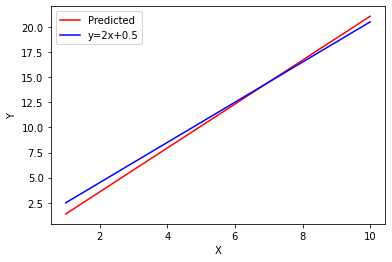

In [9]:
line_pred = pyplot.plot(inputs.numpy(),preds.detach().numpy(),'r',label = 'Predicted')
line_target = pyplot.plot(inputs.numpy(),targets.detach().numpy(),'b',label = 'y=2x+0.5')
pyplot.legend(loc="upper left")
pyplot.xlabel('X')
pyplot.ylabel('Y')
pyplot.show()


## Run linear regression with multidimensional data



$$
y =
\left[ \begin{array}{cc}
x_{11} & x_{12} &x_{13} \\
x_{21} & x_{22} &x_{23} \\
\vdots & \vdots & \vdots \\
x_{N1} & x_{N2} &x_{N3}
\end{array} \right]
%
\times
%
\left[ \begin{array}{cc}
w_{11} & w_{21} \\
w_{12} & w_{22} \\
w_{13} & w_{23}
\end{array} \right]
%
+
%
\left[ \begin{array}{cc}
b_{1} & b_{2} \\
b_{1} & b_{2} \\
\vdots & \vdots \\
b_{1} & b_{2} \\
\end{array} \right]
$$

Wine Quality dataset

We will try to solve a real problem now instead of using random data. We will use the linear regression model to
predict the wine quality based on different metrichs (pH, acidity, etc.)
You can download the dataset from the following link,
![Dataset link](https://archive.ics.uci.edu/ml/datasets/Wine+Quality),
Let's read our dataset now and explore what type of data it contains.

![wine_data](./figures/1.7.data_viz.png)

In [10]:
import csv

def read_wine_data():
    with open('./data/winequality-red.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')
        print(csv_reader)
        line_count = 0
        wine_data = []
        categories = []
        for idx,row in enumerate(csv_reader):
            #print(row)
            if idx ==0 :
                categories = row
            else:
                r = list(map(float, row))
                wine_data.append(r)
        # Convert inputs and targets to tensors
        data_tensor = torch.tensor(wine_data)
    return data_tensor,categories


a = torch.randn(1, 11, requires_grad=True)
b = torch.randn(1, requires_grad=True)

data_tensor,categories = read_wine_data()
inputs = data_tensor[:,:-1]
targets = data_tensor[:,-1].unsqueeze(-1)
print(inputs.shape)
print(targets.shape)



# Define the model
def model(x):
    return x @ a.t() + b

# MSE loss

def mse(y,y_hat):
     return((y-y_hat)**2).mean()

# Generate predictions
preds = model(inputs)
print(preds)

# Compute loss
loss = mse(preds, targets)
print(loss)

# Compute gradients
loss.backward()

# Gradients for weights
print(a)
print(a.grad)

# Gradients for bias
print(b)
print(b.grad)

a.grad.zero_()
b.grad.zero_()
print(a.grad)
print(b.grad)

torch.Size([1599, 11])
torch.Size([1599, 1])
tensor([[ -8.8427],
        [-12.6074],
        [ -8.7062],
        ...,
        [-17.3114],
        [-17.4414],
        [-10.6283]], grad_fn=<AddBackward0>)
tensor(319.4118, grad_fn=<MeanBackward0>)
tensor([[-1.3986,  0.4033,  0.8380, -0.7193, -0.4033, -0.5966,  0.1820, -0.8567,
          1.1006, -1.0712,  0.1227]], requires_grad=True)
tensor([[ -289.8224,   -17.3111,    -9.7031,   -89.3588,    -2.9629,  -579.3581,
         -1439.5339,   -33.7111,  -111.6210,   -22.5599,  -354.4185]])
tensor([-0.5663], requires_grad=True)
tensor([-33.8159])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([0.])


Let's train again our linear regression model using the wine dataset now.

In [11]:
# Train for 100 epochs
lr = 1e-4
for i in range(100):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        a -= a.grad * lr
        b -= b.grad * lr
        a.grad.zero_()
        b.grad.zero_()

print(f'Loss {loss.item():.2f}')



Loss 8.64


## Define Linear Regression model using PyTorch built in Functions

Now, we are going to reimplement the same model using PyTorch built-in libraries.
To create a linear model we will use Linear() class from torch.nn package.
To calculate MSE loss we will import nn.MSELoss() and torch.optim.SGD to
create a stochastic gradient descent optimizer to our model.
These are the main steps to do
- Read Data
- Create Dataloader
- Create Model, Optimizer and Loss Functions
- Train the model
- Test the model

Let's train again our classifier to predict the linear relationship $y=2x+0.5$
and then we are going to classify again the wine dataset.

In [12]:
inputs = torch.arange(0,10).float().unsqueeze(-1)

targets = 2. * torch.arange(0,10).float().unsqueeze(-1) + 0.5*torch.ones(10,1)

lr_model = nn.Linear(in_features=1,out_features=1)
optimizer = torch.optim.SGD(lr_model.parameters(),lr=0.001)
criterion = nn.MSELoss(size_average=True)

for i in range(100):
    preds = lr_model(inputs)
    loss = criterion(preds,targets)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
print(f'Loss {loss.item()}')
print(lr_model.weight.data)
print(lr_model.bias.data)


Loss 0.14781543612480164
tensor([[1.8806]])
tensor([1.2102])


/home/iliasprc/Documents/penvs/venv/lib/python3.6/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Now, let's classify again our wine dataset now with the PyTorch buit-in functions now

In [13]:

data_tensor,categories = read_wine_data()
#results = list(map(int, results))
print(data_tensor.shape)
print(categories)
inputs = data_tensor[:,:-1]
targets = data_tensor[:,-1].unsqueeze(-1)
print(targets)
print(inputs.shape)
print(targets.shape)
#results = list(map(int, results))

lr_model = nn.Linear(in_features=11,out_features=1)
optimizer = torch.optim.SGD(lr_model.parameters(),lr=0.0001)
criterion = nn.MSELoss(size_average=True)


torch.Size([1599, 12])
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
tensor([[5.],
        [5.],
        [5.],
        ...,
        [6.],
        [5.],
        [6.]])
torch.Size([1599, 11])
torch.Size([1599, 1])


Now, we'll create an iterable dataset in order to train our model. We'll use `TensorDataset` and  `DataLoader`
from PyTorch. `TensorDataset` takes inputs and targets tensors as arguments and wraps them together. Then `Dataloader`
combines a dataset and a sampler,  provides an iterable over the given dataset and generates batches.


In [14]:
from torch.utils.data import TensorDataset, DataLoader
# Define dataset
train_ds = TensorDataset(inputs, targets)
# Define data loader
batch_size = 100
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
#next(iter(train_dl))

Now we are ready to train our model.


In [ ]:
epochs = 10
for i in range(epochs):
    average_loss = 0.0
    for batch_index, (x,y) in enumerate(train_dl):
        preds = lr_model(x)
        loss = criterion(preds,y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        average_loss +=loss.item()
    print(f'Epoch {i} Average_loss {average_loss/len(train_dl):.2f}')


In [15]:
epochs = 10
for i in range(epochs):
    average_loss = 0.0
    for batch_index, (x,y) in enumerate(train_dl):
        preds = lr_model(x)
        loss = criterion(preds,y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        average_loss +=loss.item()
    print(f'Epoch {i} Average_loss {average_loss/len(train_dl):.2f}')


Epoch 0 Average_loss 42.85
Epoch 1 Average_loss 6.92
Epoch 2 Average_loss 4.20
Epoch 3 Average_loss 2.73
Epoch 4 Average_loss 1.89
Epoch 5 Average_loss 1.40
Epoch 6 Average_loss 1.13
Epoch 7 Average_loss 0.97
Epoch 8 Average_loss 0.88
Epoch 9 Average_loss 0.82
